In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [ ]:
df=pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [ ]:
df

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


In [ ]:
x=df["EUR="][:2500].to_numpy()
data=x.reshape(-1,10)
    

In [ ]:
x=data[:,:1]
y=data[:,-1:]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x[:200],y[:200])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict=lr.predict(x[200:])
predict.shape

(50, 1)

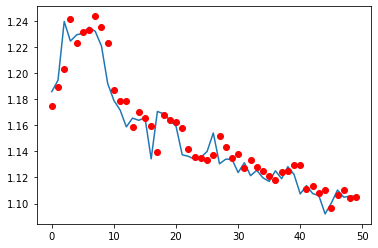

In [ ]:
plt.plot(np.ndarray.flatten(y[200:]))
plt.plot(np.ndarray.flatten(predict),"o",color='red')

In [ ]:
returns=np.log(df["EUR="]/df["EUR="].shift(1))

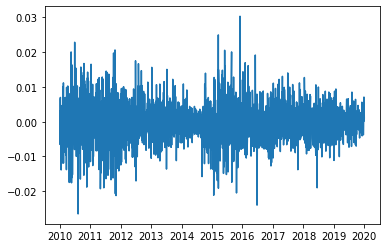

In [ ]:
plt.plot(returns)

In [ ]:
direction=np.where(returns>0,1,0)

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(62,activation="relu",input_shape=(1,)),
                                  tf.keras.layers.Dense(32,activation="relu"),
                                  tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 62)                124       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2016      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,173
Trainable params: 2,173
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

In [ ]:
x=df["EUR="].to_numpy()
mean,std=x.mean(),x.std()
x=(x-mean)/std
x=x.reshape(-1,1)
y=direction[:2500]

In [ ]:
x.shape

(2516, 1)

In [ ]:
model.fit(x[:2500],y,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 9ms/step - loss: 0.6969 - acc: 0.4651 - val_loss: 0.6928 - val_acc: 0.5180
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6919 - acc: 0.5045 - val_loss: 0.6925 - val_acc: 0.5180
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6917 - acc: 0.5146 - val_loss: 0.6923 - val_acc: 0.5180
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6923 - acc: 0.5166 - val_loss: 0.6930 - val_acc: 0.5180
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6920 - acc: 0.5205 - val_loss: 0.6924 - val_acc: 0.5180
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.5026 - val_loss: 0.6923 - val_acc: 0.5180
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6941 - acc: 0.4981 - val_loss: 0.6934 - val_acc: 0.5180
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6916 - acc: 0.50

In [ ]:
model.evaluate(x[:2500],y)

79/79 [==============================] - 0s 1ms/step - loss: 0.6912 - acc: 0.5192


[0.6912294626235962, 0.5192000269889832]

In [ ]:
pred=model.predict(x[2000:])

In [ ]:
preds=np.where(pred>=0.50,1,0).flatten()

In [ ]:
preds.shape

(2500,)

In [ ]:
strategy=returns[2000:]*preds

In [ ]:
results=pd.DataFrame([strategy,returns]).transpose()


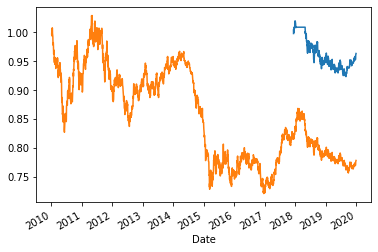

In [ ]:
strategy.cumsum().apply(np.exp).plot()
returns.cumsum().apply(np.exp).plot()

In [ ]:
x=x[:2500].reshape(-1,1,1)
direction=direction[:2500].reshape(-1,1,1)

In [ ]:
direction.shape

(2500, 1, 1)

In [ ]:
model1=tf.keras.models.Sequential([
                                  tf.keras.layers.LSTM(40,activation="relu",input_shape=[1,1],return_sequences=True),
                                  tf.keras.layers.LSTM(20,activation="relu",return_sequences=True),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [ ]:
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 40)             6720      
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 20)             4880      
_________________________________________________________________
flatten_4 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 21        
Total params: 11,621
Trainable params: 11,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

In [ ]:
model1.fit(x,direction,epochs=50,batch_size=16,validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 2s 5ms/step - loss: 0.6932 - acc: 0.5128 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.4928 - val_loss: 0.6931 - val_acc: 0.4880
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5420
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.5053 - val_loss: 0.6932 - val_acc: 0.5060
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.5375 - val_loss: 0.6933 - val_acc: 0.4680
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.5026 - val_loss: 0.6933 - val_acc: 0.4680
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.5103 - val_loss: 0.6934 - val_acc: 0.4680
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
preds=model.predict(x[:2500])

In [ ]:
preds

array([[0.49645746],
       [0.49675015],
       [0.49645066],
       ...,
       [0.495244  ],
       [0.49389213],
       [0.4962319 ]], dtype=float32)